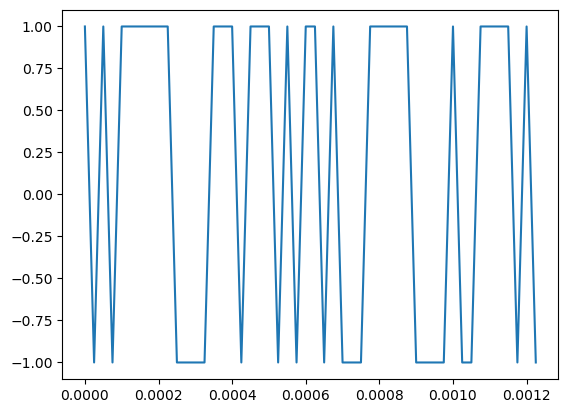

[ 1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.
  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1.]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

SIZE = 100
fc = 10000
over_sample = 4

bits = np.random.randint(0, 2, SIZE)
lst = [0]*SIZE 
nrz_bits = np.array(lst)

for index, bit in enumerate(bits):
    #nrz_bits[index] = 1 if bit else nrz_bits[index] = -1 #if True 1 -> 1, 0 -> -1
    #print(index, bit)
    if bit: nrz_bits[index] = 1
    else: nrz_bits[index] = -1

inphase_stream = nrz_bits[0::2] #pares
quadrature_stream = nrz_bits[1::2] #impares

sampling_freq = fc*4

t = np.arange(0, len(inphase_stream)/sampling_freq, 1/sampling_freq)

i_t = inphase_stream*(np.cos(2*np.pi*t*fc))
q_t = quadrature_stream*(np.sin(2*np.pi*t*fc))

s_t = i_t - q_t


plt.plot(t, s_t)
plt.show()
print(s_t)


/tmp/ipykernel_4822/3166688848.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax5.plot(t,s_t);ax5.set_xlim(0,20*L/fs);fig.show()


{'s(t)': array([ 1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
        -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
         1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,
        -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,
         1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
        -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,
        -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,
        -1.,  1.,  1., -1., -1.,  1.,  1., 

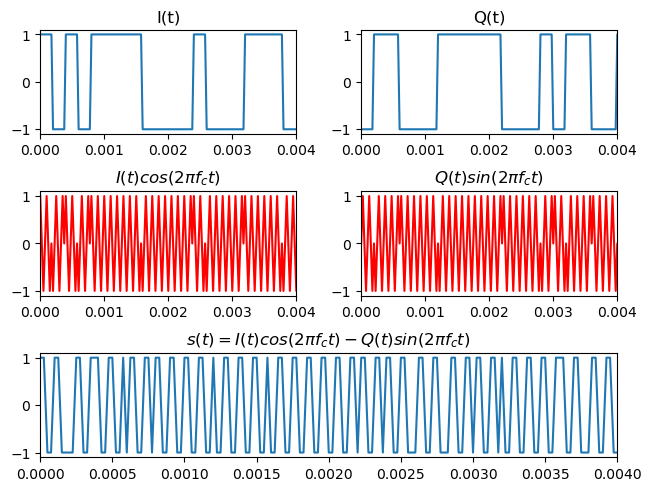

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

SIZE = 100
fc = 10000
over_sample = 4

bits = np.random.randint(0, 2, SIZE)

def qpsk_mod(a, fc, OF, enable_plot = False):
    """
    Modulate an incoming binary stream using conventional QPSK
    Parameters:
    a : input binary data stream (0's and 1's) to modulate
    fc : carrier frequency in Hertz
    OF : oversampling factor - at least 4 is better
    enable_plot : True = plot transmitter waveforms (default False)
    Returns:
    result : Dictionary containing the following keyword entries:
    s(t) : QPSK modulated signal vector with carrier i.e, s(t)
    I(t) : baseband I channel waveform (no carrier)
    Q(t) : baseband Q channel waveform (no carrier)
    t : time base for the carrier modulated signal
    """
    L = 2*OF # samples in each symbol (QPSK has 2 bits in each symbol)
    I = a[0::2];Q = a[1::2] #even and odd bit streams
    # even/odd streams at 1/2Tb baud
    from scipy.signal import upfirdn #NRZ encoder
    I = upfirdn(h=[1]*L, x=2*I-1, up = L)
    Q = upfirdn(h=[1]*L, x=2*Q-1, up = L)
    fs = OF*fc # sampling frequency
    t=np.arange(0,len(I)/fs,1/fs) #time base
    I_t = I*np.cos(2*np.pi*fc*t);Q_t = -Q*np.sin(2*np.pi*fc*t)
    s_t = I_t + Q_t # QPSK modulated baseband signal

    if enable_plot:
        fig = plt.figure(constrained_layout=True)
        from matplotlib.gridspec import GridSpec
        gs = GridSpec(3, 2, figure=fig)
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, 0])
        ax4 = fig.add_subplot(gs[1, 1])
        ax5 = fig.add_subplot(gs[-1,:])
        # show first few symbols of I(t), Q(t)
        ax1.plot(t,I)
        ax2.plot(t,Q)
        ax3.plot(t,I_t,'r')
        ax4.plot(t,Q_t,'r')
        ax1.set_title('I(t)')
        ax2.set_title('Q(t)')
        ax3.set_title('$I(t) cos(2 \pi f_c t)$')
        ax4.set_title('$Q(t) sin(2 \pi f_c t)$')
        ax1.set_xlim(0,20*L/fs);ax2.set_xlim(0,20*L/fs)
        ax3.set_xlim(0,20*L/fs);ax4.set_xlim(0,20*L/fs)
        ax5.plot(t,s_t);ax5.set_xlim(0,20*L/fs);fig.show()
        ax5.set_title('$s(t) = I(t) cos(2 \pi f_c t) - Q(t) sin(2 \pi f_c t)$')
    
    result = dict()
    result['s(t)'] =s_t;result['I(t)'] = I;result['Q(t)'] = Q;result['t'] = t
    return result


qpsk_mod(bits, fc, over_sample, True)